In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, to_rgba
from mpl_toolkits.basemap import Basemap
from matplotlib.ticker import StrMethodFormatter
import warnings
import os
warnings.filterwarnings("ignore")

In [2]:
os.chdir(r"C:\Users\HP\Documents\sshen\mathmodel\data") #changing the directory to collect data
m19 = pd.read_csv("tbol_snapshot.pbin4d-19.out-180-0.txt", sep='\s+', header=None)
mapmat = np.array(m19.iloc[:,2]).reshape(720,360).T

In [3]:
lat1 = np.linspace(-89.75, 89.75, 360)
lon1 = np.linspace(-179.75, 179.75, 720)
# Arrays representing latitude and longitude of the moon.

mapmat[mapmat == mapmat.max()] = 400
mapmat[mapmat == mapmat.min()] = 0

clev = np.linspace(mapmat.min(), mapmat.max(), 60)
# The number of 'level curves' in the filled contour plot below.

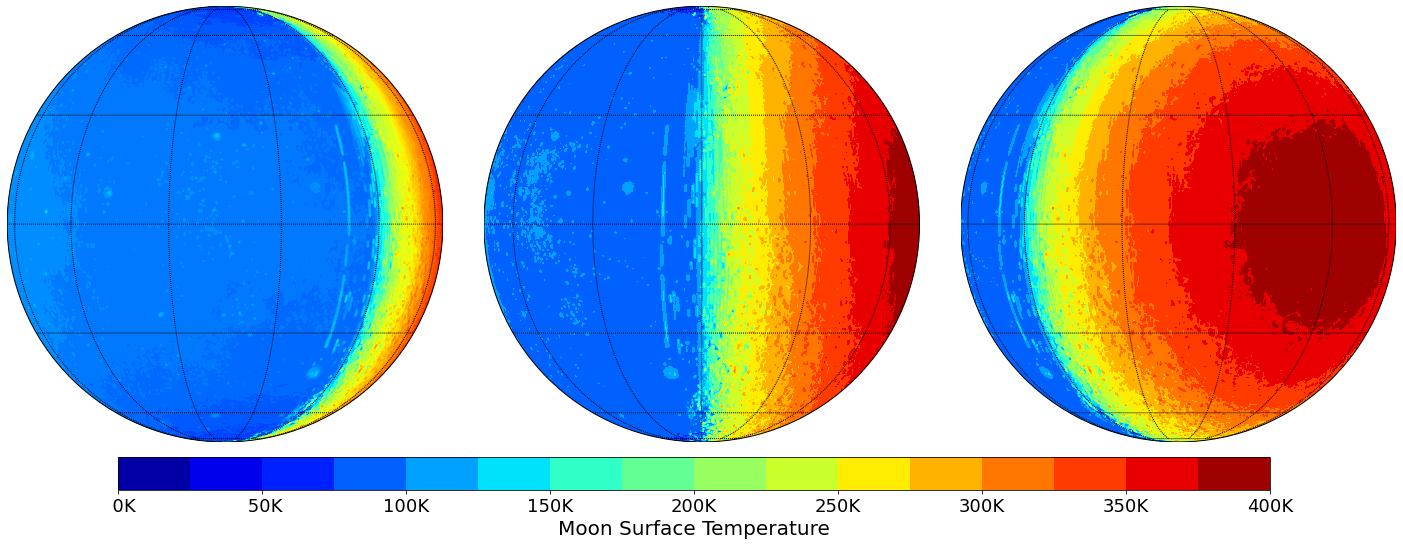

In [5]:
# based on longitude and latitude np.linspaces() defined four cells above 
lon, lat = np.meshgrid(lon1, lat1) # (360,720) 

plt.rcParams["figure.figsize"] = (20,9) # changing figure size for visibility
# create plot settings
fig, axes = plt.subplots(nrows = 1, ncols = 3)
fig.tight_layout(pad = 1.0)
# fig.suptitle("Orthographic Projection Map of the Moon Surface Temperature\n"
#           " Observed by NASA Diviner, Snapshot 19", fontweight="bold", fontsize = 25)
colmap = 'jet' # sequence of colors to be used

# set up map projection
# axes[1].set_title("Map Center \nLat 0$\degree$, Lon 0$\degree$", fontsize = 15)
map1 = Basemap(projection='ortho', lat_0=0, lon_0=0, ax = axes[1])
# draw lat/lon grid lines every 30 degrees.
map1.drawmeridians(np.arange(0, 360, 30))
map1.drawparallels(np.arange(-90, 90, 30))
# compute native map projection coordinates of lat/lon grid.
x, y = map1(lon, lat)
# contour data over the map.
cs = map1.contourf(x, y, mapmat, 15, cmap = colmap)

# set up map projection
# axes[0].set_title("Map Center \nLat 0$\degree$, Lon -45$\degree$", fontsize = 15)
map2 = Basemap(projection='ortho', lat_0=0, lon_0=-45, ax = axes[0])
# draw lat/lon grid lines every 30 degrees.
map2.drawmeridians(np.arange(0, 360, 30))
map2.drawparallels(np.arange(-90, 90, 30))
# compute native map projection coordinates of lat/lon grid.
x, y = map2(lon, lat)
# contour data over the map.
cs = map2.contourf(x, y, mapmat, clev, cmap = colmap)

# set up map projection
# axes[2].set_title("Map Center \nLat 0$\degree$, Lon 45$\degree$", fontsize = 15)
map3 = Basemap(projection='ortho', lat_0=0, lon_0=45, ax = axes[2])
# draw lat/lon grid lines every 30 degrees.
map3.drawmeridians(np.arange(0, 360, 30))
map3.drawparallels(np.arange(-90, 90, 30))
# compute native map projection coordinates of lat/lon grid.
x, y = map3(lon, lat)
# contour data over the map.
cs = map3.contourf(x, y, mapmat, 15, cmap = colmap)

# adding the colorbar
cbar_ax = fig.add_axes([0.1, 0.1, 0.8, 0.05]) # [left, bottom, width, height]
colbar = fig.colorbar(cs, cax = cbar_ax, orientation = 'horizontal')
colbar.ax.tick_params(axis = 'x',direction = 'out',labelright = True)
colbar.set_label('Moon Surface Temperature', fontsize = 20)
colbar.ax.set_xticklabels(["{:3.0f}K".format(i) for i in colbar.get_ticks()], fontsize = 18) # set ticks of your format

plt.savefig("../mathmodelcover.jpeg", dpi = 500)
plt.show()